In [0]:
#@title Import Library and getting Data

%reload_ext autoreload
%autoreload 2
%matplotlib inline

!pip install fastai==0.7.0
!pip install torchtext==0.2.3

!pip install kaggle
!mkdir .kaggle

import os
import json 
token = {"username":"hduongck","key":"983e2ab1fbb29cf2734bcbf8811d42fb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

os.makedirs('/data/bulldozers/', exist_ok=True)
os.makedirs('/.kaggle/',exist_ok=True) 
!chmod 600 /content/.kaggle/kaggle.json

!kaggle config set -n path -v{/content/data}



!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c bluebook-for-bulldozers -p /content/data/bulldozers


!unzip /content/data/bulldozers/\Train.zip -d data/bulldozers

In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
PATH = "data/bulldozers/"
df_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False, 
                     parse_dates=['saledate'])
df_raw.SalePrice = np.log(df_raw.SalePrice)

add_datepart(df_raw,'saledate')

train_cats(df_raw)

df_raw.UsageBand.cat.categories
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'],ordered=True, inplace=True)


In [0]:
df_trn,y_trn,nas = proc_df(df_raw,'SalePrice')

In [0]:
def split_vals(a,n): return a[:n],a[n:]
    
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train,X_valid = split_vals(df_trn,n_trn)
y_train,y_valid = split_vals(y_trn,n_trn)
raw_train,raw_valid = split_vals(df_raw,n_trn)

X_sub = X_train[['YearMade','MachineHoursCurrentMeter']]

In [0]:
def rmse(x,y) : return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train),y_train),
          rmse(m.predict(X_valid),y_valid),
          m.score(X_train,y_train),
          m.score(X_valid,y_valid)]
    if hasattr(m,"oob_score_"): res.append(m.oob_score_)
    print(res)

# LESSON 6

We've looked at a lot of different random forest interpretation techniques and a question that has come up a little bit on the forum is what are these for really? How do these help me get a better score on Kaggle, and my answer has been "they don't necessarily". So I wanted to talk more about why we do machine learning. What's the point? To answer this question, I want to show you something really important which is examples of how people have used machine learning mainly in business because that's where most of you are probably going to end up after this is working for some company. I'm going to show you applications of machine learning which are either based on things that I've been personally involved in myself or know of people who are doing them directly so none of these are going to be hypotheticals - these are all actual things that people are doing and I've got direct or secondhand knowledge of.

# Machine Learning Applications: Two groups 
[1:26](https://youtu.be/BFIYUvBRTpE?t=1m26s)
- Horizontal : In business, horizontal means something that you do across different kinds of business. i.e everything involving marketing. 
- Vertical : Something you do within a business or within a supply chain or a process.

**Horizontal Applications**

Pretty much every company has to try to sell more products to its customers so therefore does marketing. So each of these boxes are examples of some of the things that people are using machine learning for in marketing:

![alt text](https://cdn-images-1.medium.com/max/800/1*ztkGrMcetRaJH2TgrCoA5Q.png)

Let's take an example -- Churn. Churn refers to a model which attempts to predict who's going to leave. I've done some churn modeling fairly recently in telecommunications. We are trying to figure out for this big cellphone company which customers are going to leave. That is not of itself that interesting. Building a highly predictive model that says Jeremy Howard is almost certainly going to leave next month is probably not that helpful because if I'm almost certainly going to leave next month, there's probably nothing you can do about it.-- it's too late and it's going to cost you too much to keep me. 

So in order to understand why we would do churn modeling, I've got a little framework that might find helpful: [Desiging great data products](https://www.oreilly.com/ideas/drivetrain-approach-data-products). I wrote it with a couple of colleagues a few years ago and in it, I describe my experience of actually turning machine learning models into stuff that makes money. The basic trick is what I call the Drivetrain Approach which is these 4 steps:

![alt text](https://cdn-images-1.medium.com/max/800/1*yKjjIRt49q1w-15Pi11ILA.png)

**Defined Objective** [3:48](https://youtu.be/BFIYUvBRTpE?t=3m48s)

The starting point to actually turn a machine learning project into something that's actually useful is to know what I am trying to achieve and that does mean I'm trying to achieve a high area under the ROC curve or trying to achieve a large difference between classes. It would be I'm trying to sell more books or I'm trying to reduce the number of customers that leave next month or I'm trying to detect lung cancer earlier. These are objectives. So the objective is something that absolutely directly is the thing that the company or the organization actually wants. No company or organization lives in order to create a more accurate predictive model. These are some reasons. So that's your objective. That's obviously the most important thing. If you don't know the purpose of what you are modeling for then can't possibly do a good job of it. And hopefully people are starting to pick that up out there in the world of data science, but interestingly what very few people are talking about but it's just as important is the next thing which is levers.

**Levers** [5:04](https://youtu.be/BFIYUvBRTpE?t=5m4s)

A lever is a thing that the organization can do to actually drive the objective. So let's take the example of churn modeling. What is a lever that an organization could use to reduce the number of customers that are leaving? They could call someone and say " Are you happy? Anything we could do?" They could give them a free pen or something if they buy $20 worth of product next month. You could give them specials. So these are levers. Whenever you are working as a data scientists, keep coming back and thinking what are we trying to achieve ( we being the organization) and how we are trying to achieve it being what are the actual things we can do to make the objective happen. So building a model is never ever a lever, but it could help you with the level. 

**Data** [07:01](https://youtu.be/BFIYUvBRTpE?t=7m1s)

So then the next step is what data does the organization have that could possibly help them to set that lever to achieve the objective. So this is not what data did they give you when you started the project. But think about it from a first principle's point of view--okay, I'm working for a telecomunication company, they gave me some certain set of data, but I'm sure they must know where their customers live, how many phone calls they made last month, how many times they called customer service, etc. So have a think about okay if we are trying to decide who should we give a special offer to proactively, then we want to figure out what information do we have that might help us to identify who's going to react well or badly to that. Perhaps more interestingly would be what if we were doing a fraud algorithm. So we are trying to figure out who's going to not pay the phone that they take out of the store., they are on some 12 month payment plan, and we never see them again. Now in that case, the data we have available, it doesn't matter what's in the database, what matters is what's the data that we can get when the customer is in the shop. So there's often constraints around the data that we can actually use. So we need to know what am I trying to achieve, what can this organization acutally do specifically to change the outcome, and at the point that the decision is being made, what data do they have or could they collect. 

**Model** [8:45](https://youtu.be/BFIYUvBRTpE?t=8m45s)

So then the way I put that all together is with a model. **This is not a model in the sense of a predictive model but it's a model in the sense of a simulation model.** So one of the main example I gave in this paper is when I spent many years building which is if an insurance company changes their prices, how does that impact their probability. So generally your simulation model contains a number of predictive models. So I had, for example, a predictive model called an elasticity model that said for a specific customer, if we charge them a specific price for a specific product, what's the probability that they would say yes both when it's new business and then a year later what's the probability that they'll renew. Then there's another predictive model which is what's the probability that they are going to make a claim and how much is that claim going to be. You can then combining these models together then to say all right, if we changed our pricing by reducing it by 10% for everybody between 18 and 25 and we can turn it through these models that combined together into a simulation then the overall impact on our market share in 10 years time is X and our cost is Y and our profit is Z and so forth.

In practice, most of the time, you really are going to care more about the results of that simulation than you do about the predictive model directly. But most people are not doing this effectively at the moment. For example, when I go to Amazon, I read all of Douglas Adam's books and so have read all Douglas Adam's books, the next time I went to Amazon they said would you like to buy the collected works of Douglas Adams. This is after I had bought everyone of his books. So from a machine learning point of view, some data scientist had said oh people that buy one of Douglas Adams books often go on to buy the collected books. But recommending to me that I buy a collected book of Douglas Adams isnot smart. It's actually not smart at a number of levels. Not only is unlikely to buy a box set of something of which I have every one individually but further more it's not going to change my buying behavior. I already know about Douglas Adam. I already know I like him, so taking up your valuable web space to tell me " hey maybe you should buy more of author who you're already familiar with and boughts lots of times isn't actually going to change my behavior." **So what if instead of creating a predictive model, Amazon had build an optimization model that simulate and said if we show Jeremy this ad, how likely is he then to go on to buy this book and If I don't show him this ad, how likely is he to go on to buy this book. So that's the counterfactual.** The counterfactual is what would have happened otherwise, and then you can take the difference and say what should we recommend him that is going to maximally change his behavior. So maximally result in more books and so you'd probably say oh he's never bought any TerryPrachett book, he probably doesn't know about Terry Pratchett but lots of people that liked Douglas Adams did turn out to like Terry Pratchett so lets introduce him to a new author. 

So it's the difference between a predictive model on the one hand versus an optimization model on the other hand. So the two tend to go hand in hand. First of all we have simulation model. The simulation model is saying in the world where we put Terry Pratchett book on the front page of  Amazon for Jeremy Horward, this is what have happened. He would have bought it with a 94% probability. That then tells us with this lever of what do I put on my homepage for Jeremy today, we say okay the different settings of that lever that put Terry Pratchett on the homepage has the highest simulated outcome. Then that's the thing which maximizes our profit from Jeremy's visit to amazon.com today.

Generally speaking, **your predictive models feed into this simulation model but you kind of have to think about how they all work together**. For example, let's go back to churn. So it turned out that **Jeremy Howard is very likely to leave his cell phone company next month. What are we going to talk about it? Let's call him. And I can tell you if my cell phone company calls me right now and says " just calling to say we love you" I'd be like I'm cancelling right now. That would be a terrible idea**. So again, you would want a simulation model that says what's the probability that Jeremy is going to change his behavior as a result of calling him right now. So one of the levers I have is call him. On the other hand, if I got a piece of mail tommorow that said of each month you stay with us, we're going to give you a hundred thousand dollars. Then that's going to definitely change my behavior right? But the feeding that into the simulation model, it turns out that overall that would be unprofitable choice to make. Do you see how this fits in together?

So when you look at something like churn, **we want to be thinking what are the levers we can pull** [14:33](https://youtu.be/BFIYUvBRTpE?t=14m33s). What are kinds of models that we could build with what kinds of data to help us pull those levers better to achieve our objectives. When you think about it that way , **you realize that the vast majority of these applications are not largely about a predictive model at all. They are about interpretation. They are about understanding what happens if**. So if we take the intersection between on the one hand, here are all the levers that we could pull ( here are all the things we can do) and then here are all of the features from our random forest feature importance that turn out to be strong drivers of the outcome. So then the intersection of those is here are the levers we could pull that actually matter. Because if you can't change the thing, that is not very interesting. **And if it's not actually a significant driver, it's not very interesting. So we can actually use our random forest feature importance to tell us what can we actually do to make a difference. Then we can use the partial dependence to actually build this kind of simulation model to say okay if we did change that, what would happen**. 

So there are lots of examples and what I want you think about as you about the machine learning problems you are working on is why does somebody care about this [16:02](https://youtu.be/BFIYUvBRTpE?t=16m2s). What would a good answer to them look like and how could you actually positively impact this business. So if you are creating a Kaggle kernel, try to think about from the point of view of the competition organizer. What would they want to know and how can you give them that information. So something like fraud detection on the other hand, you probably just basically want to know whose fraudulent. So you probably do just care about the predictive model. But then you do have to think carefully about the data availability here. So okay, we need to know who is fraudulent at the point that we are going to deliver them a product. So it's no point looking at data that's availability a month later, for instance. So you have this key issue of thinking about the actual operational constrainst that you are working under. 

**Human Resourses Applications [17:17](https://youtu.be/BFIYUvBRTpE?t=17m17s)

Lots of interesting application in human resources but like employee churn, it's another kind of churn model where finding out that Jeremy Howard is stick of lecturing, he's going to leave tommorow. What are you going to do about it? Well, knowing that wouldn't actually be helpful. It would be too late. you would actually want a model that said what kinds of people are leaving USF and it turns out that everybody that goes to the downstairs cafe leaves USF. I guess their food is awful or whatever. Or everybody that we are paying less than half a million dollars a year is leaving USF because they can't afford basic housing in San Francisco. So you could use your employee churn model not so much to say which employees hate us but why do employees leave. Again it's really the interpretation there that matters. 

**Question**: For churn model, it sounds like there are two predictors that you need to predict for - one being churn and the other you need to optimize your profit. So how does it work [18:30](https://youtu.be/BFIYUvBRTpE?t=18m30s)? Yes, exactly. So this is what the simulation model is all about. You figure out this objective we  are trying to maximize which is company profitability. You can create a pretty simple Excel model or something that says here is the revenue and here is the costs and the cost is equal to the number of people we employ multiplied by their salary, etc. Inside that Excel model, there are certain cells/inputs that are kind of stochastic or uncertain. But we could predict it with a model and so that's what I do then is to say okay we need a predictive model for how likely somebody is to stay if we change their salary, how likely they are to leave with the current salary, how likely they are to leave next year if I increased their salary now, etc. So you have a bunch of different models and then you can bind them together with simple business logic and then you can optimize that. **You can then say okay if I pay Jeremy Howard half a million dollars, that probably a really good idea and if I pay him less then it's probably not or whatever. You can figure out the overall impact. So it's really shocking to me how few people do this. But most people in industry measure their models using AUC or RMSE or whatever which is never actually what you really want**. 

**More Horizontal Applications** [22:04](https://youtu.be/BFIYUvBRTpE?t=22m4s)

Lead prioritization is a really interesting one. Every one of these boxes I'm showing, you generally find a company or many companies whose sole job in life is to build models of that thing. So there are lots of companies that sell lead priortization systems but again the question is how would we use that information. So if it's like our best lead is Jeremy, he is the highest probability of buying. Does that mean I should send a saleperson out to Jeremy or I shouldn't? If he's highly probable to buy , why I waste my time with him. So again, you really want some kind of simulation that says what's the likely change in Jeremy's behavior if I send my best salesperson out to go and encourage him to sign. I think there are many many opportunities for data scientists in the world today to move beyong predictive modeling to actually bringing it all together. 

**Vertical Applications** [23:29](https://youtu.be/BFIYUvBRTpE?t=23m29s)

As well as these horizontal applications that basically apply to every company, there's a whole bunch of applications that are specific to every part of the world. For those of you that end up in healthcare, some of you will become experts in one or more of these areas. Like readmission risk. So what's the probability that this patient is going to come back to the hospital. Depending on the details of the jurisdiction, it can be a disaster for hospitals when somebody is readmitted. If you find out that this patient has a high probability of readmission, what do you do about it? Again, the predictive model is helpful of itself. It rather suggests we shouldn't send them home yet because they are going to come back. But wouldn't it be nice if we had the tree interpreter and it said to us the reason that they are at hight risk is because we don't have a recent EKG/ECG for them. Without a recent EKG , we can't have high confidence about their cardiac health. In which case, it wouldn't be like let's keep them in the hospital for two weeks, it'll be let's give them a EKG. So this is interaction between interpretation and predictive accuracy.

**Question**: So what I'm understand you are saying is that the predictive models are great but in order to actually answer these questions, we really need to focus on the interpretability of these models [24:59](https://youtu.be/BFIYUvBRTpE?t=24m59s)? Yeah, I think so. More specifically I'm saying we just learnt a whole raft of random forest interpretation techniques and so I'm trying to justify why. The reason why is because I'd say most of the time the interpretation is the thing we care about. You can create a chart or a table without machine learning and indeed that's how most the world works. **Most managers build all kinds of tables and charts without any machine learning behind them. But they often make terrible decisions because they don't know the feature importance of the objective they are interested in and so the table they create is of things that actually are the least importance things anyway**. Or they just do a univariate chart rather than a partial dependence plot. , so they don't actually realize that the relationship they thought they are looking at is due entirely to something else. SO i'm kind of arguing for data scientists getting much more deeply involved in strategy and in trying to use machine learning to really help a business with all of its objectives. There are companies like dunnhumby which is a huge company that does nothing but retail application with machine learning. I believe there's like dunnhumby product you can buy which will help you figure out if I put my new store in this location versus that location, How many people are going to shop there. Or if I put my diapers in this part of the shop versus that part of the shop, how is that going to impact purchasing behavior, etc. So it's also good to realize that the subset of machine learning applications you tend to hear about in the tech press or whatever is this massively biased tiny subset of stuff which Google and Facebook do. Where else the vast majority of stuff that actually makes the world go around is these kinds of applications that acutally help people make things, buy things, sell things, build things, so forth. 

**Question**: About tree interpretation, we looked at which feature was more important for a particular observation. For businesses, they have a huge amount of data and they want this interpretation for a lot of observations so how you they automate it? So they set threshold [27:50](https://youtu.be/BFIYUvBRTpE?t=27m50s)? 

- The vast majority of machine learning models don't automate anthing. They are designed to provide information to humans. So for example, if you are a customer service phone operator for an insurance company and your customer asks you why is my renewal $500 more expensive than last time, then hopefully the insurance company provides in your terminal those little screen that shows the result of the tree interpreter or whatever. So you can jump there and tell the customer that last year you were in this different zip code which has lower amounts of car theft and this year also you've actually changed your vehicle to more expensive one. So it's not so much about thresholds and automation, but about making these model outputs available to the decision makers in the organization whether they be at the top strategic level of like are we going to shutdown this whole product or not, all the way to the operational level of that individual discussion with a customer. 

So another example is aircraft scheduling and gate management. There's lots of companies that do that and basically what happens is that there are people at an airport whose job it is to basically tell each aircraft what gate to go to, to figure out when to close the doors, stuff like that. So the idea is you're giving them software which has the information they need to make good decisions. So the machine learning models end up embedded in that software to say okay that plane that's currently coming in from Miami, there's a 48% chance that it's going to be over 5 minutes late and if it does then this going to be the knock-on impact through the rest of the terminal, for instance. So that's how these things fit together.

**Other applications**[31:02]

![alt text](https://cdn-images-1.medium.com/max/600/1*d9ZIIxC9Nu0glVkxJZzc0A.png)

There are lots of applications, and what I want you to do is to spend some time thinking about them. Sit down with one of your friends and talk about a few examples. For example, how would we go about doing failure analysis in manufacturing, who would be doing that, why would they be doing it, what kind of models might they use, what kind of data might they use. Start to practice and get a sense. Then when you're at the workplace and talking to managers, you want to be straightaway able to recognize that the person you are talking to - what are they trying to achieve, what are the levers they have to pull, what are the data they have available to pull those levers to achieve that thing, and therefore how could we build models to help them do that and what kind of predictions would they have to be making. So then you can have this really thoughful empathetic conversation with those people and then saying " in order to reduce the number of customers that are leaving, I guess you are trying to figure out who should you be providing better pricing to" and so forth. 

**Question**: Are explanatory problems people are faced with in social sciences something machine learning can be useful for or is used for or is that nor really the realm that’s in [32:29]? I’ve had a lot of conversations about this with people in social sciences and currently machine learning is not well applied in economics or psychology or whatever on the whole. But I’m convinced it can be for the exact reasons we are talking about. So if you are going to try to do some kind of behavioral economics and you’re trying to understand why some people behave differently to other people, a random forest with a feature importance plot would be a great way to start. More interestingly, if you are trying to do some kind of sociology experiment or analysis based on a large social network dataset where you have an observational study, you really want to try and pull out all of the sources of exogenous variables (i.e. all the stuff that’s going on outside) so if you use a partial dependence plot with a random forest that happens automatically. I actually gave a talk at MIT a couple of years ago for the first conference on digital experimentation which was really talking about how do we experiment in things like social networks in these digital environments and economists all do things with classic statistical tests but in this case, the economists I talked to were absolutely fascinated by this and they actually asked me to give an introduction to machine learning session at MIT to these various faculty and graduate folks in the economics department. And some of those folks have gone on to write some pretty famous books and so hopefully it’s been useful. It’s definitely early days but it’s a big opportunity. But as Yannet says, there’s plenty of skepticism still out there. The skepticism comes from unfamiliarity basically with this totally different approach. So if you spent 20 years studying econometrics and somebody comes along and says here is a totally different approach to all the stuff econometricians do, naturally your first reaction will be “prove it”. So that’s fair enough but I think over time the next generation of people who are growing up with machine learning, some of them will move into the social sciences, they’ll make huge impacts that nobody has ever managed to make before and people will start going wow. Just like happened in computer vision. When computer vision spent a long time of people saying “maybe you should use deep learning for computer vision” and everybody in computer vision said “Prove it. We have decades of work on amazing feature detectors for computer vision.” And then finally in 2012, Hinton and Kryzanski came along and said “our model is twice as good as yours and we’ve only just started on this” and everybody was convinced. Nowadays every computer vision researchers basically uses deep learning. So I think that time will come in this area too.


# Different random forest interpretation methods [37:17](https://youtu.be/BFIYUvBRTpE?t=37m17s)

Having talked about why they are important, let's know remind ourselves what they are.

**Confidence based on tree variance**

What does it tell us? Why would be interested in that? How is it calculated?

The variance of the predictions of the trees. Normally the prediction is just the average, this is variance of the trees.

Just to fill in a detail here, what we generally do here is we take just one row/observation often and find out how confident we are about that(i.e how much variance there are in the trees for that) or we can do as we did here for different groups [39:34]

![alt text](https://cdn-images-1.medium.com/max/600/1*4g87qyAsvYoBcFZJjJCWgA.png)



In [0]:
set_rf_samples(50000)

In [0]:
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3, max_features=0.5,n_jobs=-1,
                         oob_score=True)
m.fit(X_train,y_train)
print_score(m)

[0.20583741967250446, 0.24776012189170568, 0.9114510360572389, 0.8903747022351828, 0.8944522370333964]


We saw how the model averages predictions across the trees to get an estimate -- but how can we know confidence of estimation? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the relative confidence of predictions -- that is, for rows where the trees give very different results, you would want to be more cautious of using those results , compared to cases where they are more consistent. Using the same example as in the last lesson when looked at bagging:



In [0]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]),np.std(preds[:,0])

CPU times: user 1.57 s, sys: 82.1 ms, total: 1.65 s
Wall time: 1.65 s


(9.25694332675128, 0.30560481191219785)

When we use python to loop through trees like this, we're calculating each in series, which is slow! We can use parallel processing to speed things up:

In [0]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m,get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 119 ms, sys: 253 ms, total: 372 ms
Wall time: 1.81 s


(9.25694332675128, 0.30560481191219785)

We can see that different trees are giving different estimates to this auction. In order to see how prediction confidence varies, we can add this into our dataset.

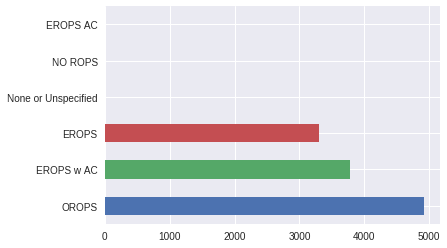

In [0]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds,axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [0]:
flds = ['Enclosure','SalePrice','pred','pred_std']
enc_summ = x[flds].groupby('Enclosure',as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.840581,0.269772
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.575757,0.263331
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.682856,0.224482


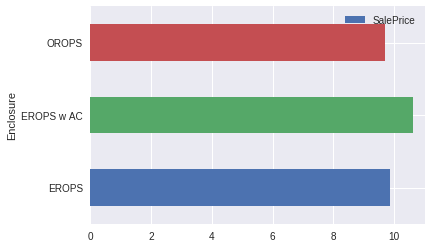

In [0]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure','SalePrice','barh',xlim=(0,11));

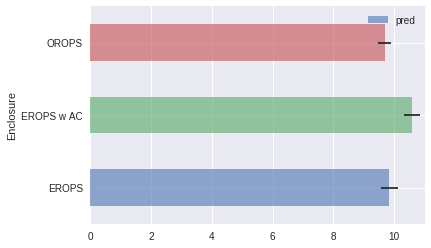

In [0]:
enc_summ.plot('Enclosure','pred','barh',xerr='pred_std',alpha=0.6,xlim=(0,11));

What we've done here is to say if there are any groups that we are very unconfident (which could be due to very little observations). Something that I think is even more important would be when you are using this operationally. Let's say you are doing a credit decisioning algorithm. **So we are trying to determine whether Jeremy is a good risk or a bad risk. Should we loan him a million dollars. And the random forest says " I think he's a good risk but I'm not at all condident"**. And in which case, we might say okay maybe I shouldn't give him a million dollars. Where else, if the random forest said " I think he's a good ris and I'm very sure of that" then we are much more comfortable giving him a millon dollars. And I'm a very good risk. So feel free to give me a  millon dollars.

It's quite hard for me to give you direct experience with this kind of single observation interpretation because it's really the kind of stuff that you actually need to be putting out to the front line. [41:30]. It's not something which you can really use so much in a Kaggle context but it's more like if you are actually putting out some algorithm which is making big decisions that could cost a lot of money, you probably don't so much care about the average prediction of the random forest but maybe you actually care about the average minus a couple standard deviations (i.e what's the worst-case prediction). Maybe there is whole group that we are unconfident about, so that's confidence based on tree variance.



Question : Why are the predictions nearly exactly right, but the error bars are quite wide?

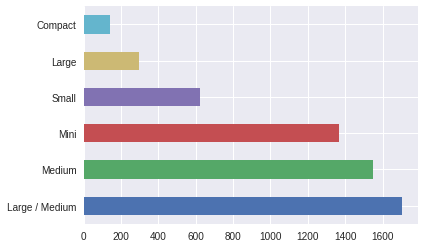

In [0]:
raw_valid.ProductSize.value_counts().plot.barh();

In [0]:
flds = ['ProductSize','SalePrice','pred','pred_std']
summ = x[flds].groupby('ProductSize').mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.859670,0.341300
Large,10.470589,10.375237,0.361594
Large / Medium,10.691871,10.645883,0.296793
Medium,10.681511,10.623792,0.285337
Mini,9.535147,9.559736,0.247113
Small,10.324448,10.333061,0.295755


In [0]:
(summ.pred_std/summ.pred).sort_values(ascending=True)

ProductSize
Mini              0.025849
Medium            0.026858
Large / Medium    0.027879
Small             0.028622
Compact           0.034616
Large             0.034852
dtype: float64

#Feature importance [42:36](https://youtu.be/BFIYUvBRTpE?t=42m36s)

Student : It's basically to find out which features are important. You take each feature and shuffle the values in the feature and check how the predictions change. It it's very different, it means that the feature was actually important; otherwise it is not important.

Jeremy : That was exactly right. There were some details that were skimmed over a little bit. Anybody else  wants to jump into a more detailed description of how it's calculated? How exactly do we calculate feature importance for a particular feature?

Student: After you are done building a random forest model, you take each column and randomly shuffle it. And you run a prediction and check the validation score. If it gets bad after shuffling one of the columns, that means that column was important, so it has a higher importance. I'm not exactly sure how we quantify the feature importance. 

Jeremy: Ok great. Do you know how we quantify the feature importance? That was a great description. To quantify, we can take the difference in $R^2$ or score of some sort. So let's say we've got our dependent variable which is price and there's a bunch of independent variables including year made [44:22](https://youtu.be/BFIYUvBRTpE?t=44m22s). We use the whole lot to build a random forest and that gives us our predictions. Then we can compare to get $R^2$ , RMSE, whatever you are interested in from the model.

![alt text](https://cdn-images-1.medium.com/max/600/1*SHhSeZOMQMlIo7POpSCVAQ.png =400x300)

Now the key thing here is I don't want to have to retrain my whole random forest. That's slow and boring, so using the existing random forest. How can I figure out how important YearMade was? So the suggestion was, let's randomly shuffle the whole column. Now that column is totally useless. It's got the same mean, same distribution. Everything about it is the same, but there's no connection at all between actual YearMade and what's now in that column. I've randomly shuffled it. So now I put that new version through same random forest ( so there is no retraining done) to get some $\hat{y}(ym)$. Then I can compare that to my actuals to get RMSE(3, for example) with YearMade scrambled with RMSE of 2. Enclosure scrambled had RMSE of 2.5. Then I just take these differences. For YearMade, the importance is 1, Enclosure is 0.5 and so forth. How much worse did my model get after I shuffled that variable.

![alt text](https://cdn-images-1.medium.com/max/600/1*t4hKrRUomtBBuS9ymK5ciQ.png =400x300)

**Question**: Would all importance sum to one [46:52](https://youtu.be/BFIYUvBRTpE?t=46m52s)? Honestly, I've never actually looked at what the units are, so I'm not quite sure. We can check it out during the week if somebody 's interested. Have a look at sklearn code and see exactly what those units of measures are because I've never bothered to check. Although I don't check like the units of measure specifically, what I do check is the relative importance. Here is an example. 



In [0]:
fi =rf_feat_importance(m,df_trn);fi[:10]

,cols,imp
5,YearMade,0.172367
37,Coupler_System,0.123649
13,ProductSize,0.093789
14,fiProductClassDesc,0.087094
2,ModelID,0.050565
63,saleElapsed,0.050202
10,fiSecondaryDesc,0.047849
38,Grouser_Tracks,0.046838
8,fiModelDesc,0.034111
19,Enclosure,0.031135


Rather than just saying what are the top ten, yesterday one of the practicum students asked me about a feature importance where they said " oh, I think three are important" and I pointed out that the top one was thousand times more important than the second one. So look at the relative number here. So in that case, it's like "no, i don't look at the top three, look at the one that's a thousand times more important and ignore all the rest". Your natural tendency is to want to be precise and careful, but this is where you need to override that and be very practical. This thing is thousand times more important. Don't spend anytime on anything else. Then you can go and talk to your manager of your project and say this thing is a thousand times more important. An then they might say " oh, that was a mistake. I shouldn't been in there. We don't actuallly have that information at the decision time or for whatever reason we can't actually use that variable". So then you could remove it and have a look. Or they might say " gosh, I had no idea that was by far more important than everything else put together. So let's forget this random forest thing and just focus on understanding how we can better collect that one variable and better  use that one variable". So that's something which comes up quite a lot and actually another place that came up just yesterday. 

Another practicum student asked me " I'm doing this medical diagnostics project and my $R^2$ is 0.95 for a disease which I was told is very hard to diagnose. Is this random forest genius or is something going wrong?". And I said remember, the second thing you build after buiding a random forest is to do feature importance. So do this, and what you'll find probaly is that the top column is something that shouldn't be there. So that's what happened. He came back to me half an hour later, he said "yeah, I did the feature importance and you were right. The top column was basically a something that was another encoding of dependent variable. I've removed it and now my $R^2$ is -0.1 so that's an improvement".

The other thing i like to look at is this chart [50:03]:



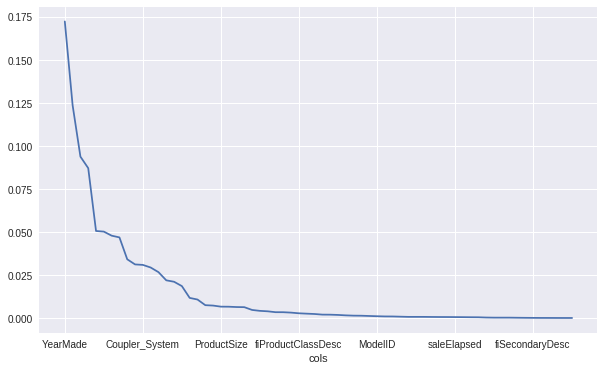

In [0]:
fi.plot('cols','imp',figsize=(10,6),legend=False);
plt.xticks(np.arange(len(fi),step=10),fi.cols.values);

Basically it says where things flatten off in terms of which ones I should be really focusing on. So that's the most importane one. When I did credit scoring in telecomnunications, I found there were 9 variables that basically predicted very accurately who was going to end up paying for their phone and who wasn't. Apart from ending up with a model that saved them 3 billion dollars a year in fraud and credit costs, it also let them basically .... their process so they focused on collecting those 9 variables much better. 

# Partial dependence [50:46](https://youtu.be/BFIYUvBRTpE?t=50m46s)

This is an interesting one. Very important but in some ways kind of tricky to think about.



In [0]:
!pip install pdpbox
!pip install scikit-misc
from pdpbox import pdp
from plotnine import *

In [0]:
set_rf_samples(50000)
df_trn2,y_trn,nas = proc_df(df_raw,'SalePrice',max_n_cat=7)
X_train,X_valid = split_vals(df_trn2,n_trn)
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,
                          max_features= 0.6,n_jobs=-1)
m.fit(X_train,y_train);

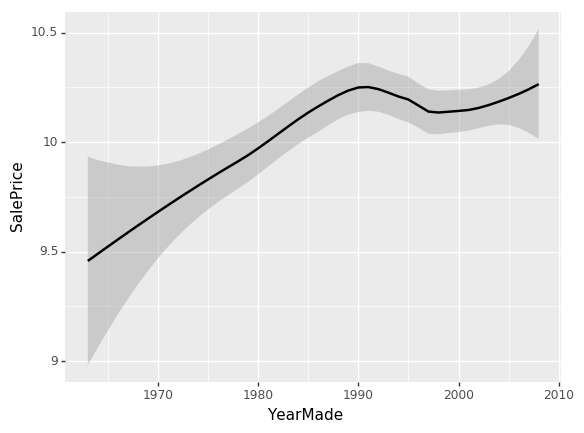

<ggplot: (-9223363310365825753)>

In [0]:
x_all = get_sample(df_raw[df_raw.YearMade>1930],500)
ggplot(x_all, aes('YearMade','SalePrice'))+stat_smooth(se=True,method='loess')

Let's come back to how we calculate this in a moment, but the first thing to realize is that the vast majority of the time, when somebody shows you a chart, it will be like a univariate chart that'll just grab the data from the database and they'll plot X against Y. Then managers have a tendency to want to make a decision. So it would be " oh, there's this drop-off here, so we should stop dealing in equipment made between 1990 and 1995". There is a big problem because real world data has lots of these interactions going on. So maybe there was a recession going on around the time that those things are being sold or maybe around that time, people were buying more of a different type of equipment. So generally what we actually want to know is all other things being equal, what's the relationship between YearMade and SalePrice. Because if you think about the drivetrain approach idea of the levers, you really want a model that says if I change this lever, how will it change my objective. It's by pulling them apart using partial dependence that you can say actually this is the relationship between YearMade and Saleprice all other things being equal:

In [0]:
x = get_sample(X_train[X_train.YearMade>1930],500)

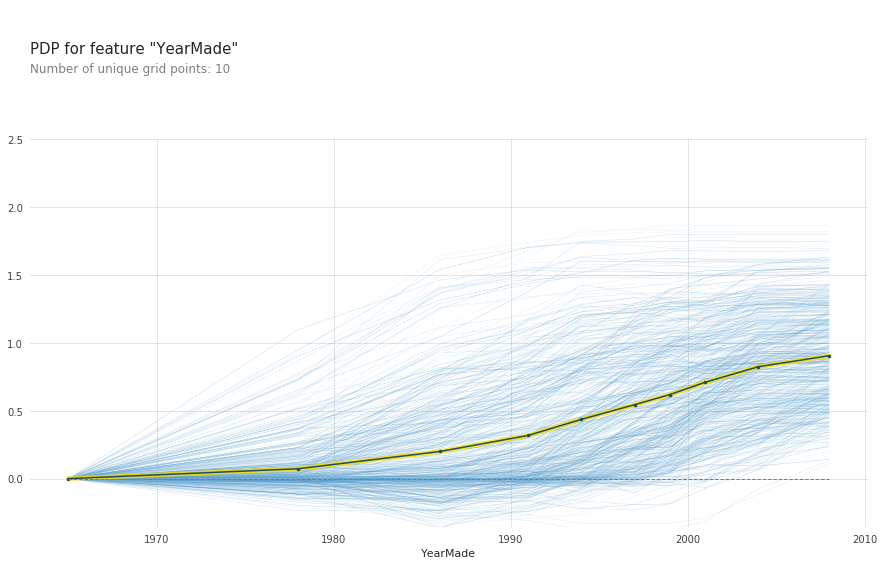

In [0]:
def plot_pdp(feat,clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m,x,x.columns,feat)
    return pdp.pdp_plot(p, feat_name,plot_lines=True,
                       cluster=clusters is not None,
                       n_cluster_centers=clusters)
plot_pdp('YearMade');


So how do we calculate that?

**Student** : For the variable YearMade, for example, you keep all other variables constant. Then you are going to pass every single value of the YearMade, train the model after that. So for every model you'll have light blue lines and the median is going to be the yellow line. 

**Jeremy** : So let's try and draw that. By "leave everything else constant", what she means is leave them at whatever they are in the dataset. So just like when we did feature importance, we are going to leave the rest of the dataset as it is. And we're going to do partial dependence plot for YearMade. So we've got all of these other rows of data that we will just leave as they are. Instead of randomly shuffling YearMade, what we are going to do is replace every single value with exactly the same thing -1960. Just like before, we now pass that through our existing random forests which we have not retrained or changed in any way to get back out a set of predictions y1960. Then we can plot that on a chart - YearMade against partial dependence. 

![alt text](https://cdn-images-1.medium.com/max/600/1*kRbqT4GvBMd8pnCy0ZE2gA.png =400x300)

Now we can do that for 1961, 1962, 1963, and so forth. We can do that on average for all of them, or we could do it just for one of them. So when we do it for just one of them and we change its YearMade and pass that single thing through our model, that gives us one of these blue lines. So each one of these blue lines is a single row as we change its yearMade from 1960 up to 2008. So then we can just take the median of all of these blue lines to say on average what's the relationship between YearMade and price all other things being equal. **Why is it that it works? Why is it that this process tells us the relationship between yearMade and price all other things being equal?** Maybe it's good to think about a really simplified approach [56:03](https://youtu.be/BFIYUvBRTpE?t=56m3s) . A really simplified approach would say what's the average auction? What 's  the average sale data, what's the most common type of machine we well? Which location we mostly sell things? And we could come up with a single row that represents the average auction and then we could say okay, let's run that row through the random forest but replace its YearMade with 1960 and do it again with 1961 and we could plot those on our little chart. That would give us a version of relationship between yearMade and SalePrice all other things being equal. But what if tractors looked like that the blackhoe loaders looked like a flat line:

![alt text](https://cdn-images-1.medium.com/max/600/1*QdKCE7eL83msiG_vg62wDw.png)

Then taking the average one would hide the fact that there are these totally different relationships. So instead, we basically say, okay our data tells us what kinds of things we tend to sell, who we tend to sell them, and when we tend to sell them, so let's use that. Then we actually find out for every blue line, here are actually examples of these relationships. So when what we can do is as well as plotting the median, we  can do a cluster analysis to find out a few different shapes.

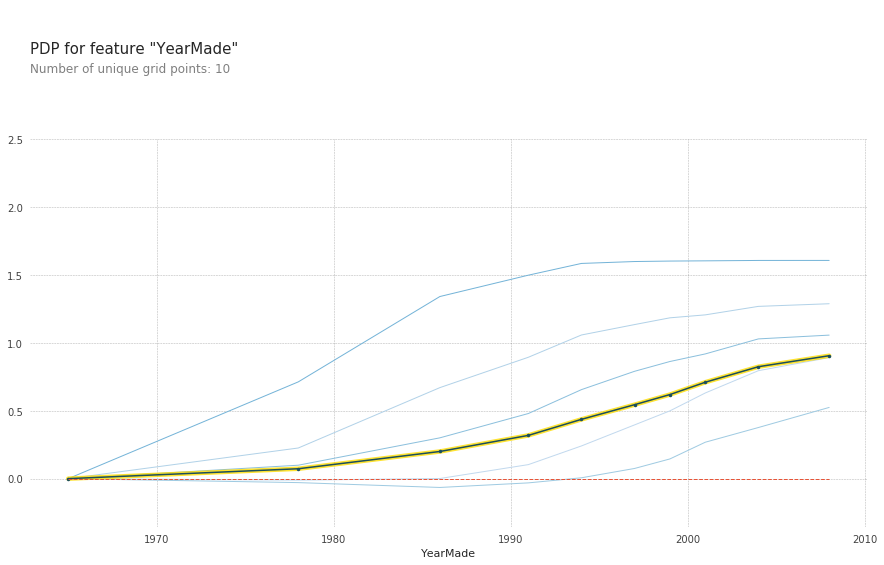

In [0]:
plot_pdp('YearMade',clusters=5);

In this case, they all look pretty much the different versions of the same thing with different slopes, so we main takeaway from this would be that the relationship between Saleprice and YearMade is basically a straightline. And remember, this was a log of sale price so this is actually showing us an exponetial. So this is where I would then bring in the domain expertise which is like " okay, things depreciate over time by a constant ratio so therefore, I would expect older stuff YearMade to have this exponential shape". **So this is where , as I mentioned, the very start of my machine learning project, I generally try to avoid using as much domain expertise as I can and let the data do the talking.** 

**So one of the questions I got this morning was " there's like a SaleID and modelID, I should throw those away , right? Because they are just IDs". No** Don't assume anything about your data. Leave them in and if they turn out to be super important predictors, you want to find out why that is. 

But then, now I'm at the other end of my project. I've done my feature importance, I've pulled out the stuff which is from the dendrogram (i.e redundant features ), I'm looking at the partial dependence and now I'm thinking okay is this hape what I expected? So even better, before you plot this , first of all think what shape would I expect this to be. Because, it's always easy to justify to yourself after the fact, oh , I knew it would look like this. So what shape you expect and then is it that shape? In this case, I'd say this what I would expect. Where else the previous plot is not what I'd expect. So the the partial dependence plot has really pulled out the underlying truth.

**Question**: Say you have 20 features that are important, are you going measure the partial dependence for every single one of them [1:00:05](https://youtu.be/BFIYUvBRTpE?t=1h5s) ? 

- If there are 20 features that are important , then I will do the partial dependence for all of them where important means like it's a lever I can actually pull , the magnitude of its size is not much smaller than the other 19, you know , based on all these things it's a feature I ought to care about then I will want to know how it's related . It's pretty unusual to have that many features that are important both operationally and from a modeling point of view in my experience.

**Question**: How do you define importance [1:00:58](https://youtu.be/BFIYUvBRTpE?t=1h58s)? 
- Important means it's a lever (something I can change) and it's on the spiky end of this tail (left):

![alt text](https://cdn-images-1.medium.com/max/1600/1*UdYTS33Uu9GcvpaT8Kqe-Q.png =400x300)

Or many it's not a lever directly. Maybe it's like zip code and I cannot actually tell my customers where to live but I could focus my new marketing attention on a different zip code.

Question: Would it make sense to do pairwise shuffling for every combination of two features and hold everything else constant in feature important to see interactions and compare scores [1:01:45](https://youtu.be/BFIYUvBRTpE?t=1h1m45s) ? You would not do that so much for partial dependence. I think your question is really getting to the question of could we do that for feature importance. I think interaction feature importance is a very importance and interesting question. But doing it by randomly shuffling every pair of columns , if you've got a hundred columns, it sounds computationally intensive, possibly infeasible. So what I’m going to do is after we talk about tree interpreter, I’ll talk about interesting but largely unexplored approach that will probably work.

# Tree interpreter [1:02:43](https://youtu.be/BFIYUvBRTpE?t=1h2m43s)

**Prince**: I was thinking this to be more like feature importance, but feature importance is for complete random forest model, and **this tree interpreter is for feature importance for particular observation**. So let's say it's about hospital readmission. If a patient A is going to be readmitted to a hospital, which feature for that particular patient is going to impact and how can we change that. It is calculated starting from the prediction of mean then seeing how each feature is changing the behavior of that particular patient. 

**Jeremy**: That was one of the best examples of technical communication I've heard in a long time, so it's really good to think about why was that effective. So what Prince did there was, he used as specific an example as possible. Humans are much less good as understading abstractions. So if you say " it takes some kind of feature, and then there's an observation in that feature" whereas it's hospital readmission. So we take a specific example. The other thing he did was very effective was to take an analogy to something we already understand. So we aldready understand the idea of feature importance across all of the rows in a dataset. So now we are going to do it for a single row. So one of the things I was really hoping we would learn from this experience is how to become effective technical communicators. So that was a really great role model from Prince of using all the tricks we have at our disposal for effective technical communication. So hopefully you found that useful explanation. I don't have a lot to add to that other than to show you what that looks like.

With the tree interpreter, we picked out a row [1:04:56](https://youtu.be/BFIYUvBRTpE?t=1h4m56s)



In [0]:
!pip install treeinterpreter

In [0]:
from treeinterpreter import treeinterpreter as ti

In [0]:
to_keep = fi[fi.imp>0.005].cols

In [0]:
df_keep = df_trn[to_keep].copy()

In [0]:
df_train,df_valid = split_vals(df_raw[to_keep],n_trn)
m= RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.6,
                       n_jobs=-1)
m.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
X_train,X_valid = split_vals(df_keep,n_trn)

In [0]:
row = X_valid.values[None,1]; row

array([[      1996,          0,          5,         21,      12042, 1291852800,          0,          0,
              3234,          1,          0,          0,    4364757,       2010,       1112,    1265434,
                 4,          0,          4,          4,          9,         49,        343,          0]])

In [0]:
prediction, bias, contributions = ti.predict(m,row)

In [0]:
prediction[0],bias[0]

(array([9.28546]), 10.10617131689131)

Remember when we talked about the confidence intervals at the very start (the confident based on tree variance). We said you mainly use that for a row. So this would also be for a row. So it's like " why is this patient likely to be readmitted?" Here is all the information we have about that patient or in this case this auction. Why is this auction so expensive? So then we call **ti.predict** and we get back the prediction of the price, the bias (i.e the root of the tree -- so this is just the average price for everybody so this is always going to be the same), and then the contributions which is how important is each of these things:


In [0]:
idxs = np.argsort(contributions[0])

In [0]:
[o for o in zip(df_keep.columns[idxs],df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.6707190018740548),
 ('SalesID', 4364751, -0.08550543209384731),
 ('saleElapsed', 1284595200, -0.07008502511731365),
 ('Enclosure', 'EROPS', -0.06268250448154436),
 ('fiModelDesc', 'KX1212', -0.034494305544637796),
 ('fiBaseModel', 'KX121', -0.03310371052553766),
 ('fiModelDescriptor', nan, -0.027111680646640223),
 ('saleYear', 2010, -0.026317952725475012),
 ('ModelID', 665, -0.024866865599229505),
 ('state', 'Ohio', -0.014189767636517692),
 ('saleDayofyear', 259, -0.012019369179767958),
 ('saleDay', 16, -0.008721517421556958),
 ('fiSecondaryDesc', nan, -0.004220903936131215),
 ('MachineID', 2300944, -0.004052585401231701),
 ('Tire_Size', nan, 0.0),
 ('Hydraulics', 'Standard', 0.005813608190671093),
 ('ProductGroupDesc', 'Track Excavators', 0.005885208854337831),
 ('Drive_System', nan, 0.010804522733661859),
 ('ProductGroup', 'TEX', 0.013154925493142632),
 ('Grouser_Tracks', nan, 0.015910676171579707),
 ('Hydraulics_Flow', nan, 0.018262410812742536),
 ('YearM

The way we calculated that was to say at the very start, the average price was 10. Then we split on enclosure. For those with this enclosure, the average was 9.5. Then w split on YearMade less than 1990 and for those with that year made, the average price was 9.7. Then we split on the number of hours on the meter, and with this branch, we got 9.4.

![alt text](https://cdn-images-1.medium.com/max/800/1*C1B_L2p3swobkP5xjFtiDA.png =400x200)

We then have a particular auction which we pass it through the tree. It just so happens that it takes the top most path. One row can only have one path through the tree. So we ended up at 9.4. Then we can create a little table. As we go through, we start at the top and we start with 10 -- that's our **bias**. And we said enclosure resulted in a change from 10 to 9.5 (i.e -0.5). YearMade changed it from 9.5 to 9.7 (i.e +0.2), then meter changed it from 9.7 to 9.4 (-0.3). Then if we add all that together (10 -0.5 +0.2 -0.3), lo and behold that's the prediction. 

![alt text](https://cdn-images-1.medium.com/max/800/1*lFvmKkIZRpAOSzYP_jJvWw.png =400x200)

Which takes us to our Excel spreadsheet [1:08:07](https://youtu.be/BFIYUvBRTpE?t=1h8m7s)

![alt text](https://cdn-images-1.medium.com/max/800/1*qrUdmMZPOfaRF4lN6Lg5mg.png =400x300)

Last week, we have use Excel for this because there wasn't a good Python library for doing waterfall charts. So we saw we got our starting point this is the bias, and then we had each of our contributions and we ended up with our total. The world is now a better place because Chris has created a Python waterfall chart module for us and put it on pip. So never again where we have to use Excel for this. I wanted to point out that waterfall charts have been very important in business communications at least as long I've been in business . And now people want the Python waterfall chart will end up at Chris Github repo and hopefully find lots of other USF contributors who have made it even better. We now have docstrings for most of the fastai.structured library.



In [0]:
!pip install waterfallcharts

In [0]:
import waterfall_chart

In [0]:
np.append(0,contributions[0][idxs])

array([ 0.     , -0.67072, -0.08551, -0.07009, -0.06268, -0.03449, -0.0331 , -0.02711, -0.02632, -0.02487,
       -0.01419, -0.01202, -0.00872, -0.00422, -0.00405,  0.     ,  0.00581,  0.00589,  0.0108 ,  0.01315,
        0.01591,  0.01826,  0.05098,  0.06549,  0.07107])

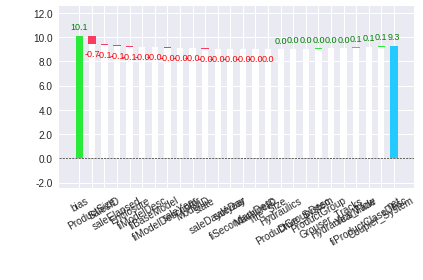

In [0]:
waterfall_chart.plot(np.append('bias',df_keep.columns[idxs]),np.append(bias[0],contributions[0][idxs]));

Does anybody have any questions about how to calculate any of these random forest interpretation methods or why we might want to use them [1:12:50](https://youtu.be/BFIYUvBRTpE?t=1h12m50s)? Towards the end of the wek, you 're going to need to be able to build all of these yourself from scratch.

**Question**: Just looking at the tree interpretation, I noticed that some of the values are nan's. I get why you keep them in the tree but how can nan have a feature importance [1:13:19](https://youtu.be/BFIYUvBRTpE?t=1h13m19s)?

- Let's me pass it back to you. Why not? So in other words, how is nan handled in Pandas and therefore in the tree? Does anybody remember, notice these are all in categorical variables, how does Pandas handle nan 's in categorical variable and how does fastai deal with them? Pandas sets them to -1 categorical code and fastai adds one to all of the categorical code so it ends up being zero. In other words, remember by the time it hits the random forest it's just a number, and it's just zero. And we map it back to the descriptions back here. So the question really is why shouldn't the random forest be able to split on zero? It's just another number. So it could be nan, high, medium, low = 0,1,2,3. So missing values are one of these things that are generally taught really badly. Often people get taught here are some ways to remove columns with missing values or remove rows with missing values or to replace missing values. That's never what we want because missingness is very very very often interesting. So we actually learnt that from our feature importance that coupler_system nan is one of the most important features. For some reason, well, I could guess right? Coupler_system nan presumably means this is a kind of industrial equipment that doesn't have a Coupler_System. Now I don't know what kind that is , but apparently it's more expensive kind. 

I did this competition for university grant research success where by far the most important predictors were whether or not some of the fields were null [1:15:41](https://youtu.be/BFIYUvBRTpE?t=1h15m41s). It turned out that this was data leakage that these fields only got filled in most of the time after a research grant was accepted. So it allowed me to win that Kaggle competition but didn't actually help the university very much. 



# Extrapolation [1:16:16](https://youtu.be/BFIYUvBRTpE?t=1h16m16s)

I am going to do something risky and dangerous which is we are doing to do some live coding. The reason we are going to do some live coding is I want to explore extrapolation together with you, and I also want to give you a feel of how you might go about writing code quickly in this notebook environement. And this is the kind of stuff that you are going to need to be able to do in the real world and in the exam is quickly create the kind of code that we are going to talk about.

I really like creating systhetic datasets anytime I'm trying to investigate the behavior of something because If I have a synthetic dataset, I know how I should behave.

Which reminds me, before we do this, I promised that we would talk about interaction importance and I just about forgot.



# Interaction importance [1:17:24](https://youtu.be/BFIYUvBRTpE?t=1h17m24s)

Tree interpreter tells us the contributions for a particular row based on the difference in the tree. We would calculate that for every row in our dataset and add them up. That would tell us the feature importance in a different way. One way of doing feature importance is by shuffling the columns one at a time. Another way is by doing three interpreter for every row and adding them up. Neither is more right the others. They are actually both quite widely used so this is kind of type 1 and type 2 feature importance. So we could try to expand this a little bit. 

To do not just a single variable feature importance, but interaction feature importance.  Now here is the thing. What I'm going to describe is very easy to describe. It was described by Breiman right back when random forests were first invented, and it is part of the commercial software product from Salford systems who have the trademark on random forests. But it is not part of any opensource library I'm aware of, and I've never seen an academic paper that actually studies it closely. So what I'm going to describe here is a huge opportunity but it's also like there's lots and lots of details that need to be fleshed out. But here is the basic idea. 

This particular difference here (in red) is not just because of YearMade but because of a combination of YearMade and Enclosure [1:19:15](https://youtu.be/BFIYUvBRTpE?t=1h19m15s):

![alt text](https://cdn-images-1.medium.com/max/800/1*90LSUmGN25GC-Ndw_plNow.png =400x200)

The fact is that this is 9.7 is because Enclosure was in this branch and YearMad was in this branch. So in other words, we could say the contribution of enclosure interacted with YearMade is -0.3.

So what about the difference between 9.5 and 9.4? That's an interaction of YearMade and hours on the Meter. I'm using star here not to mean " times" but to mean " interacted with". So it's a common way of doing things like R's formulars do it this way as well. So YearMade interacted with Meter has a contribution of -0.1

![alt text](https://cdn-images-1.medium.com/max/800/1*667F6C3Y0dx3dFwZRyR3BA.png)

Perhaps we could also say from 10 to 9.4 , this also shows an interaction between meter and Enclosure with one thing in between them. So we could say meter interacted with Enclosure equals ... and what should it be? Should it be -0.6? Some ways that seems unfair because we are also including the impact of YearMade. So maybe it should be -0.6 and maybe we should add back this 0.2 (9.5 to 9.7). These are like details that I actually don't know the answer to. How should we best assign a contribution to each pair of variables in this path? But clearly conceptually we can. The pairs of variables in that path all represent interactions.

**Question**: Why don't you force them to be next to each other in the tree [1:21:47](https://youtu.be/BFIYUvBRTpE?t=1h21m47s)? I'm not going to say it's wrong approach. I don't think it's the right approach though. Because it feels like in this path, meter and enclosure are interacting. So it seems like not recognizing that contribution is throwing any information. But I'm not sure. I had one of my staff at Kaggle actually do some R&D on this a few years ago and they actually found ( I wasn't close enough to know how they dealt with these details), but they got it working pretty well. But unfortunately I never saw the light of days as a software product. But this is something maybe group of you could get together and build. Do some googling to check, but I really don't think that there are any interaction feature importance parts of any open source library.

**Question** : Wouldn't this exclude interactions though between variables that don't matter until they interact? So say your row never chooses to split down that path, but that variable interacting with another one becomes your most important split [1:22:56](https://youtu.be/BFIYUvBRTpE?t=1h22m56s). I don't think that happens. Because if there is an interaction that's important only because it's an interaction ( and not in a univariate basis), it will appear sometimes, assuming that you set max features to less than one. So therefore it will appear in some path. 

**Question**: What is meant by interaction? Is it multiplication, ratio, addition [1:23:31](https://youtu.be/BFIYUvBRTpE?t=1h23m31s)?
- Interaction means appears on the same path through a tree. In the above example, there is an interaction between Enclosure and YearMade because we branched on Enclosure and then we branched on YearMade. So to get to 9.7 , we have to have some specific value of Enclosure and some specific value of YearMade.

**Question**: What if you went down the middle leaves between the two things you are trying to look at and also the in between steps. There seems to be a way to average information out in between them [1:24:03](https://youtu.be/BFIYUvBRTpE?t=1h24m3s)? There could be. I think what we should do is talk about this on the forum. I think this is fascinating and I hope we build something great, but I need to do my live coding. That was a great discussion. Keep thinking about it and do some experiments.



# Back to Live Coding for extrapolation [1:24:50](https://youtu.be/BFIYUvBRTpE?t=1h24m50s)

So to experiment with that, you almost certainly want to create a synthetic dataset first. It's like y = x1+x2+x1*x2 or something. Something where you know there is this interaction effect and there isn't that interaction effect, and you want to make sure that the feature importance you get at the end is what you expected.

So probably the first step would be to do single variable feature importance using the tree interpreter style approach [1:25:14](https://youtu.be/BFIYUvBRTpE?t=1h25m14s). One nice thing about this is it does'nt really matter how much data you have . All you have to do to calculate feature importance is just slide through tree. So you should be able to write in a way that's actually pretty fast, so even writitng it in pure Python might be fast enough depending on your tree size. 

**We are going to talk about extrapolation** and the first thing I want to do is create a synthetic dataset that has a simple linear relationship. We are going to pretend it's like a time series. So we need to create some x values. The easiest way to create some synthetic data of this type is to use **linspace which just creates some evenly spaced data between start and stop by default 50 observations.**

In [0]:
x = np.linspace(0,1); x

array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245, 0.14286, 0.16327, 0.18367, 0.20408,
       0.22449, 0.2449 , 0.26531, 0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816, 0.42857,
       0.44898, 0.46939, 0.4898 , 0.5102 , 0.53061, 0.55102, 0.57143, 0.59184, 0.61224, 0.63265, 0.65306,
       0.67347, 0.69388, 0.71429, 0.73469, 0.7551 , 0.77551, 0.79592, 0.81633, 0.83673, 0.85714, 0.87755,
       0.89796, 0.91837, 0.93878, 0.95918, 0.97959, 1.     ])

Then we are going to create dependent variable, so let's assume there is a linear relationship between x and y, and let's add a little bit of randomness to it. **random.uniform** between low and high, so we could add somewhere between -0.2 and 0.2, for example.

In [0]:
y = x + np.random.uniform(-0.2,0.2,x.shape)

In [0]:
x.shape

(50,)

So in other words, **(50,) is x.shape** . Remember when you see something in parentheses with a comma, that's a tuple with just one thing in it. So this is shape 50 and so we added 50 random numbers. Now we can plot those. 

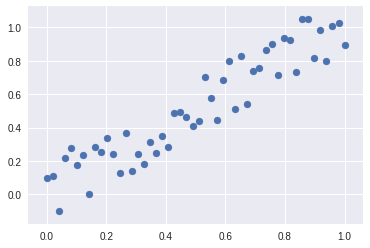

In [0]:
plt.scatter(x,y);

Alright, so there is our data. When you were both working as a data scientist or for doing your exams in this course, you need to be able to quickly whip up a dataset like that, throw it up in a plot without thinking too much. As you can see, you don't have to really remember much if anything. You just have to know how to hit **shift+tab** to check the names of parameters, google, or something to try and find **linspace** if you forgot what it's called. 

So let's assume that's our data [1:28:33](https://youtu.be/BFIYUvBRTpE?t=1h28m33s). We're now going to build a random forest model and what I want to do is build a random forest model that kind of acts as if this is a time series. So I'm going to take left part as a training set. And take the right part as our validation or test set just like we did in groceries or bulldozers.

![alt text](https://cdn-images-1.medium.com/max/800/1*f2RkmJSxC5cGw2vZ3SAcDw.png =400x300)

We can use exactly the same kind of code that we used in split_vals. So we can say:

In [0]:
x_trn,x_val = x[:40],x[40:]

In [0]:
y_trn,y_val = y[:40],x[40:]

In [0]:
m = RandomForestRegressor().fit(x,y)

ValueError: ignored

That's actually going to give an error and the lesson why is that it expects x to be a matrix, not a vector, because it expects x to have a number of columns of data. 

**So it's important to know that a matrix with one column is not same thing as a vector.**

So if we try to run this, " Expected 2D array, got 1D array instead". So we need to convert 1D array into a 2D array. Remember I said, x.shape is (50,). So x has one axis and x's rank is 1. The rank of a variable is equal to the length of it's shape - how many axes is has. Vector we can think of as an array of rank 1 and matrix as an array of rank 2. I very rarely use words like vector or matrix because they are kind of meaningless -- specific example of something more general which is they are all N dimensional tensors or N dimensional arrays. So an N dimensional array we can say it's a tensor of rank N. They basically mean kind of the same thing. Physicists get crazy when you say that because to a physicist, a tensor has quite a specific meaning but in machine learning, we generally use in in the same way.

So how do we turn an 1D array to 2D array. There are couple of ways we can do it but basically we slice it. **Colon (:) means give me everything in that axis**. **:,None** means give me everything in the first axis ( which is only axis we have) and then None is a special indexer which means add a unit axis here. So let me show you.



In [0]:
x[:,None].shape

(50, 1)

That is of shape (50,1), so it's a rank 2. It has two axes. One of them is a very boring axis- it's length one axis. So let's move None to the left . There is (1,50). Then to remind you, the original is (50,).

In [0]:
x[None,:].shape

(1, 50)

So you can see I put None as a special indexer to introduce a new unit axis there. So x[None,:] has one row and 50 columns. x[:,None] has 50 rows and 1 column- so that's what we want. This kind of playing around with ranks and dimension is going to become increasingly important in this course and in the deeplearning course. So spend a lot of time slicing with None, slicing with other things, try to create 3D, 4D tensors and so forth. I'll show you two tricks.

The first is you never ever need to to write **,:** as it's always assumed. So these are exactly the same thing.

In [0]:
x[None].shape

(1, 50)

And you see that in code all the time, so you need to recognize it. 

The second trick is x[:,None] is adding an axis in the second dimension ( or I quess index 1 dimension). What if I always want to put it in the last dimension? Often our tensors change dimensions without us looking because you went from a one channel image to a 3 channel image, or you went from a single image to a mini batch of images. Suddenly , you get new dimensions appearing. So make things general, I would say **... which means as many dimensions as you need to fill this up. So in this case (x[...,None].shape)**, it's exactly the same but I would always try to write it that way because it means it's going to continue to work as I get higher dimensional tensors.

So in this case, I want 50 rows and 1 column. I 'll call that x1. Let's now use that here so this is now a 2D array and so I can create my random forest. 

In [0]:
x1 = x[...,None]
x_trn,x_val =x1[:40],x1[40:]
y_trn,y_val = y[:40],y[40:]

In [0]:
m= RandomForestRegressor().fit(x_trn,y_trn)

Then I could plot that, and this is where you're going to have to turn your brains on because the folks this morning got this very quickly which was super impressive. I'm going to plot y_trn and m.predict(x_trn). Before I hit go, what is this going to look like? It should basically be the same. Our predictions hopefully are the same as the actuallys. So this should fall on a line but there is some randomness so it won't quite.

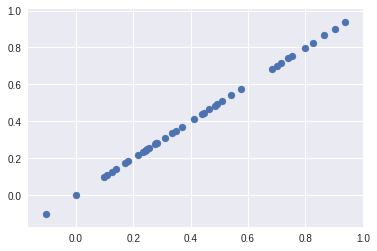

In [0]:
plt.scatter(y_trn,m.predict(x_trn))

That was the easy one. Let's now do the hard one, the fun one. What is that going to look like?



```
plt.scatter(y_val,m.predict(x_val))
```

Think about what trees do and think about the fact that we have a validation set on the right and a training set on the left:

![alt text](https://cdn-images-1.medium.com/max/800/1*GTRAYdoNiyX5c8IIy8NcFQ.png)

So think about a forest is just a bunch of trees.

TIm : I'm guessing since all the new data is actually outside of the original scope, so it's all going to be basically the same-- it's like one huge group. [1:37:15](https://youtu.be/BFIYUvBRTpE?t=1h37m15s).

Jeremy: Yeah, right. So forget the forest, let's create one tree. So we are probably going to split somewhere around here first, then split somewhere here, .. So our final split is right most node. Our prediction, when we take one from validation set, so it's going to put that through the forest and end up predicting the right most average. It can't predict anything higher than that because there is nothing higher to average.

![alt text](https://cdn-images-1.medium.com/max/800/1*GA1NvRHcLCup-Xp7dkf2lA.png)

So this is really important to realize a random forest is not magic. It's just returning the average of nearby observations where nearby is kind of in this "tree space". So let's run it and see if Tim is right.


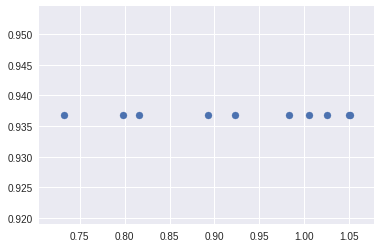

In [0]:
plt.scatter(y_val,m.predict(x_val))

That's awful. I don't know how random forests work then this is going to totally screw you. If you think that it's actually going to be able to extrapolate to any kind of data it hasn't seen before., particualrly future time period, it's just not. It just can't. It 's just averaging stuff it's already seen. That's all it can do. 

**Okay, so we are going to be talking about how to avoid this problem. We talked a little bit in the last lesson about trying to avoid it by avoiding unnecessary time dependent variables where we can. But in the end, if you really have time series that looks like this, we actually have to deal with a problem. One way we could deal with the problem would be use a neural network**. Use something that actually has a function or shape that can actually fit something like this so it will extrapolate nicely:

![alt text](https://cdn-images-1.medium.com/max/800/1*1Zor1O_1KUOZBVuYLXTzPQ.png)

**Another approach would be to use all the time series techniques you guys are learning about in the morning class to fit some kind of time series and then detrend it. Then you'll end up with detrended dots and then use the random forest to predict those. That's particularly cool because imagine what your random forest was actually trying to predict data which was two different states. So the blues ones are down there, and the red ones are up here.**

![alt text](https://cdn-images-1.medium.com/max/800/1*zt-I0xITdUy_bmFuKNb9Ww.png)

If you try to use random forest, it's going to do a pretty crappy job because time is going to seem much more important. So it's basically still going to split like this and split like that, then finally once it gets down to left corner, it will be like "okay, now I can see the difference between the states"

![alt text](https://cdn-images-1.medium.com/max/800/1*fEanIBrKTxc6cCJ40dRYhA.png)

In other words, when you've got this big time piece going on, you're not going to see the other relationships in the random forest until every tree deals with time. So one way to fix this would be with a gradient boosting machine (GBM). What a GBM does is, it creates a little tree, and runs everything through that first little tree (which could be the time tree) then it calculates the residuals and next little tree just predicts the residuals. **So it would be kind of like detrending it, right? GBM still can't extrapolate to the future but at leat they can deal with time dependent data more conveniently**.

We are going to be talking about this quite alot more over the next couple of weeks, and **in the end that a solution is goint to be just use NeuralNetwork**. But for using some kind of time series analysis, detrend it , and then use random forest on that isn't a bad technique at all. If you are playing around something like Ecuador groceries competition, that would be a really good thing to fiddle around with.
 



In [0]:
def rmse(x,y) : return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(x_trn),y_trn),
    rmse(m.predict(x_val),y_val),
    m.score(x_trn,y_trn),
    m.score(x_val,y_val)]
    if hasattr(m,'oob_score_') : return res.append(m.oob_score_)
    
    print(res)

In [0]:
print_score(m)

[4.886873367543068e-17, 0.10874084255478218, 1.0, -0.006761061010459146]
